In [1]:
%matplotlib inline

import sys
import os
import io
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#import numba
#@numba.jit(nopython=True)

In [2]:
verbose = True

def FLUSH(i,I):
    '''Display percentage of completion'''
    sys.stdout.write("\r"+"{:.2f}% done ({}/{})".format(i/I*100,i,I))
    sys.stdout.flush()

## 1D Exact Solution

In [3]:
def Exact_1d(N,J,h): # for T=1
    '''Analytic solution to 1-dim Ising model'''
    SH = np.sinh(h)
    CH = np.cosh(h)
    E4 = np.exp(-4*J)
    X = (CH-np.sqrt(np.square(SH)+E4))/(CH+np.sqrt(np.square(SH)+E4))
    return (1-np.power(X,N))/(1+np.power(X,N)) * SH/np.sqrt(np.square(SH)+E4)

In [4]:
def Exact_TL_1d(J,h): #  for T=1
    '''Analytic solution to 1-dim Ising model in thermodynamic limit (N --> infty)'''
    SH = np.sinh(h)
    E4 = np.exp(-4*J)
    return SH/np.sqrt(np.square(SH)+E4)

## 1D Brute Force MC

In [5]:
def Hamiltonian_1d(s,J,h):
    H_ext = -h * np.sum(s)
    H_int = -J * np.sum(s*np.roll(s,1)) # add factor 2 to include double counting
    return H_int + H_ext

In [6]:
def bf_1d(s, J, h):
    return np.exp(-Hamiltonian_1d(s,J,h))

In [7]:
def spin_config_1d(N):
    return np.random.choice((-1,+1),int(N))

In [8]:
def MC_brute_force_1d(sample_size, N, J, h):
    '''Monte Carlo sampler'''
    num, den = 0, 0
    for i in range(int(sample_size)):
        s = spin_config_1d(N)
        BF = bf_1d(s,J,h)
        num += s.sum() * BF
        den += BF
    return (num/den)/N
vMC_brute_force_1d = np.vectorize(MC_brute_force_1d)

## 1D Metropolis-Hastings MC

In [9]:
def DeltaS_1d(s,x,J,H): # T = 1
    nx = s.size
    return 2*s[x]*(J*(s[(x+1)%nx]+s[(x-1)])+H) # change in energy from spinflip

In [10]:
def metropolis_hastings_1d(N,J,H):
    
    N = int(N) # make sure we have an integer number of lattice sites

    nTherm = 500 # number of thermalization steps
    nMeas = 1000 # number of mesurements

    m = np.array([]) # holds magnetization measurements
    p = 0 # number of accepts

    s = np.array([(-1)**x for x in range(N)]) # initial spin configuration

    # thermalization
    for i in range(nTherm):
        x = np.random.randint(N) # choose random spin to flip
        if np.random.uniform(0,1) <= np.exp(-DeltaS_1d(s,x,J,H)) : s[x]*=-1 # accept / reject
    
    # measurements
    for j in range(nMeas):
        for x in range(N): # sweep through the lattice
            if np.random.uniform(0,1) <= np.exp(-DeltaS_1d(s,x,J,H)) : # accept / reject
                s[x]*=-1
                p += 1
        m=np.append(m,s.mean()) # take measurement
    
    return m.mean(), p/(nMeas*N) # mean magnetization (per spin) & probability of acceptance

v_metropolis_hastings_1d = np.vectorize(metropolis_hastings_1d)

## 2D MEtropolis-Hastings MC

In [11]:
def metropolis_hastings_2d(s):
    Lambda = s.size
    nx, ny = s.shape
    return nx,ny

In [12]:
x = np.array([[1,2,3],[4,5,6]])
print(metropolis_hastings_2d(x))

(2, 3)


## Run Stuff

In [13]:
# Settings
J = 1     # coupling to neighbouring spins
H = 0.25  # coupling to exterinal magnetic field
N = 12    # number of spins (lattice sites)


varying N


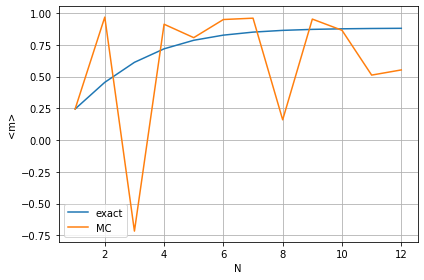

In [14]:
# calculation of Monte-Carlo simulations for varying number of spins (n)
print("\n"+"="*100+"\nvarying N")

n = np.linspace(1,N,N) # create array of different n
m = Exact_1d(n,J,H) # calculate exact solution

X = vMC_brute_force_1d(np.power(2,n),n,J,H)

# plot everything
plt.plot(n,m,label="exact",color="C0")
plt.plot(n,X,label="MC",color="C1")

plt.legend(loc="best")
plt.grid()
plt.xlabel("N")
plt.ylabel("<m>")
plt.tight_layout()
plt.show()
#plt.savefig("varN.pdf")
#plt.close()


varying N
[0.016      0.037      0.042      0.066      0.0604     0.071
 0.05628571 0.0765     0.104      0.0778     0.084      0.077     ]


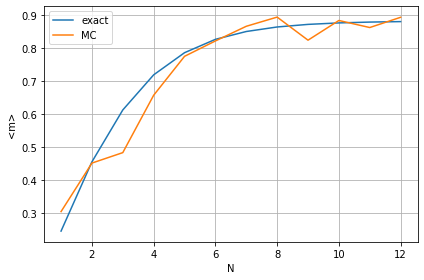

In [15]:
# calculation of Monte-Carlo simulations for varying number of spins (n)
print("\n"+"="*100+"\nvarying N")

n = np.linspace(1,N,N) # create array of different n
m = Exact_1d(n,J,H) # calculate exact solution

X, P = v_metropolis_hastings_1d(n,J,H)

print(P)

# plot everything
plt.plot(n,m,label="exact",color="C0")
plt.plot(n,X,label="MC",color="C1")

plt.legend(loc="best")
plt.grid()
plt.xlabel("N")
plt.ylabel("<m>")
plt.tight_layout()
plt.show()
#plt.savefig("varN.pdf")
#plt.close()



varying h


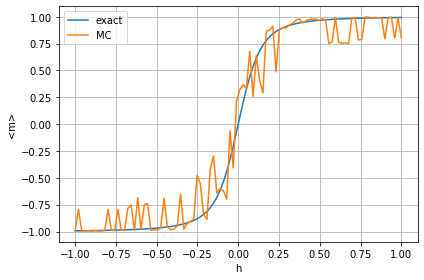

In [16]:
# calculation of Monte-Carlo simulations for varying (coupling to) external field (h)
print("\n\n"+"="*100+"\nvarying h")

h = np.linspace(-1,1,100) # create array of different h
m = Exact_1d(N,J,h) # calculate exact solution

X = vMC_brute_force_1d(np.power(2,N),N,J,h)

# plot everything
plt.plot(h,m,label="exact",color="C0")
plt.plot(h,X,label="MC",color="C1")

plt.legend(loc="best")
plt.grid()
plt.xlabel("h")
plt.ylabel("<m>")
plt.tight_layout()
plt.show()
#plt.savefig("varh.pdf")
#plt.close()



varying h


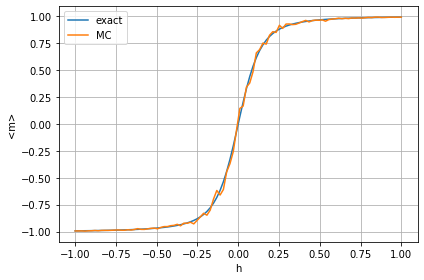

In [17]:
# calculation of Monte-Carlo simulations for varying (coupling to) external field (h)
print("\n\n"+"="*100+"\nvarying h")

h = np.linspace(-1,1,100) # create array of different h
m = Exact_1d(N,J,h) # calculate exact solution

X, P = v_metropolis_hastings_1d(N,J,h)

# plot everything
plt.plot(h,m,label="exact",color="C0")
plt.plot(h,X,label="MC",color="C1")

plt.legend(loc="best")
plt.grid()
plt.xlabel("h")
plt.ylabel("<m>")
plt.tight_layout()
plt.show()
#plt.savefig("varh.pdf")
#plt.close()



varying both


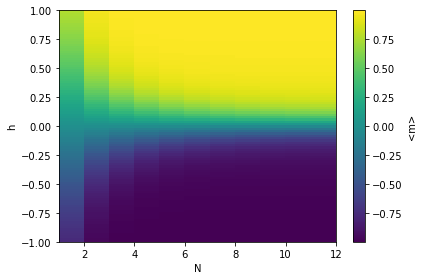

In [18]:
# calculation of Monte-Carlo simulations for varying number of spins (n) AND varying (coupling to) external field (h)
print("\n\n"+"="*100+"\nvarying both")
n = np.linspace(1,N,N) # create array of different n
h = np.linspace(-1,1,100) # create array of different h
a,b = np.meshgrid(n, h)
m = Exact_1d(a,J,b) # calculate exact solution

# plot exact solution
plt.pcolormesh(n,h,m,cmap="viridis")

cbar = plt.colorbar()
cbar.set_label("<m>")
plt.xlabel("N")
plt.ylabel("h")
plt.tight_layout()
plt.show()
#plt.savefig("2dplot.pdf")
#plt.close()

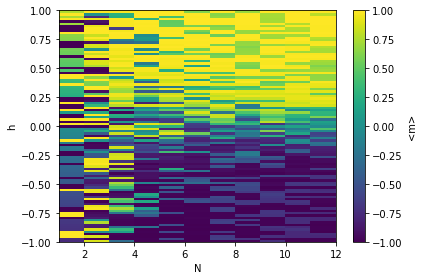

In [19]:
# calculate the Monte-Carlo simulation
n = np.linspace(1,N,N)
h = np.linspace(-1,1,100)
a,b = np.meshgrid(n, h)
m2 = vMC_brute_force_1d(np.power(2,a),a,J,b)

# plot MC results
plt.pcolormesh(n,h,m2,cmap="viridis")

cbar = plt.colorbar()
cbar.set_label("<m>")
plt.xlabel("N")
plt.ylabel("h")
plt.tight_layout()
plt.show()
#plt.savefig("2dplot_2.pdf")
#plt.close()

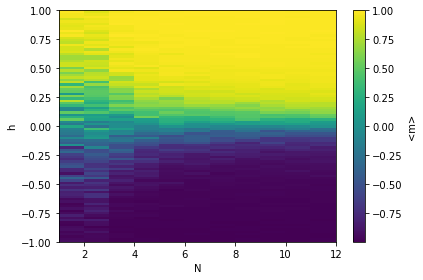

In [20]:
# calculate the Monte-Carlo simulation
n = np.linspace(1,N,N)
h = np.linspace(-1,1,100)
a,b = np.meshgrid(n, h)
m3, p3 = v_metropolis_hastings_1d(a,J,b)

# plot MC results
plt.pcolormesh(n,h,m3,cmap="viridis")

cbar = plt.colorbar()
cbar.set_label("<m>")
plt.xlabel("N")
plt.ylabel("h")
plt.tight_layout()
plt.show()
#plt.savefig("2dplot_2.pdf")
#plt.close()